In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('onlinefraud.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.drop('isFlaggedFraud',axis=1,inplace=True)

In [6]:
df.shape

(6362620, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 485.4+ MB


In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe(include = 'object')              ## categorical data

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [12]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))
 
int_ = (df.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 3
Integer variables: 2
Float variables: 5


In [13]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
## counting no. of payment in each payment type

df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

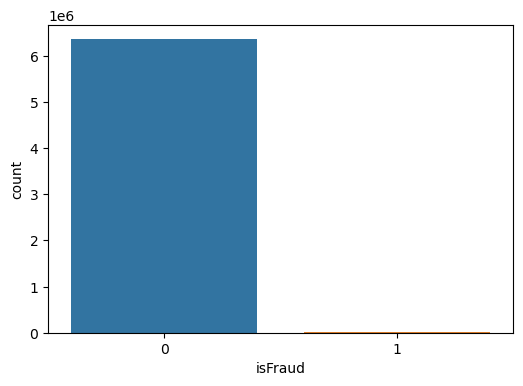

In [15]:
## plotting isfraud

plt.figure(figsize = (6,4))
sns.countplot(x='isFraud', data=df)

* There are much more non-fraudulent transactions than fraudulent transactions.
* Both classes are not in proportion that is we have imbalanced dataset.

<AxesSubplot:ylabel='isFraud'>

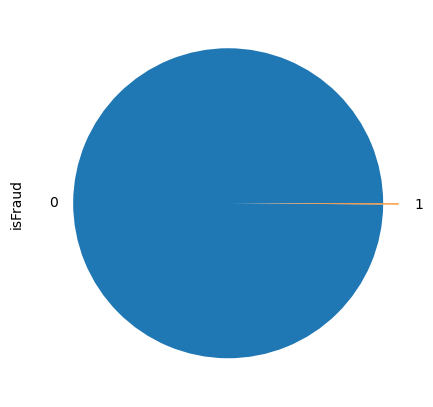

In [16]:
plt.figure(figsize=(5,6))
df['isFraud'].value_counts().plot(kind='pie', labels=[0,1], explode=[0,0.1])

In [17]:
df['amount'].value_counts()

10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.19         1
12257.89          1
Name: amount, Length: 5316900, dtype: int64

C:\Users\Rishika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


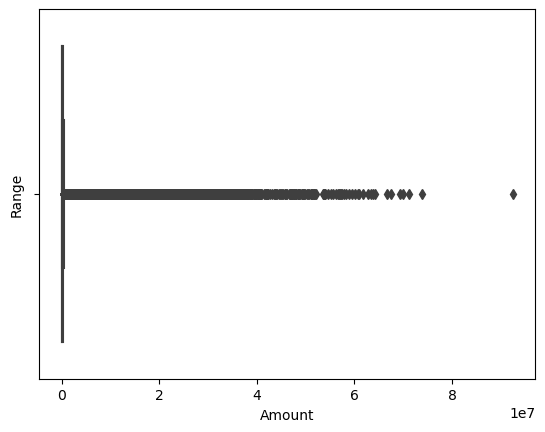

In [18]:
## outlier
sns.boxplot(df['amount'])
plt.xlabel('Amount')
plt.ylabel('Range')
plt.show()

In [19]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

## univariate analysis

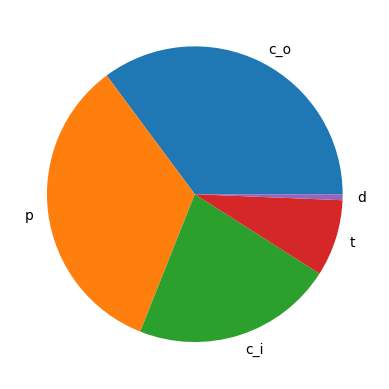

In [20]:
## pie chart for categorical feature

plt.pie(x=df['type'].value_counts(), labels=['c_o','p','c_i','t','d'])
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

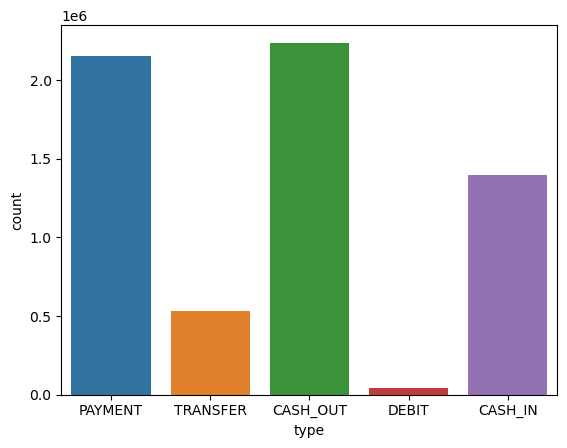

In [21]:
# count plot of the Payment type column

sns.countplot(x='type', data=df)

* **Cash out** is **the most numerous** transaction type, followed by payment, cash in, transfer and debit types.

<AxesSubplot:ylabel='Density'>

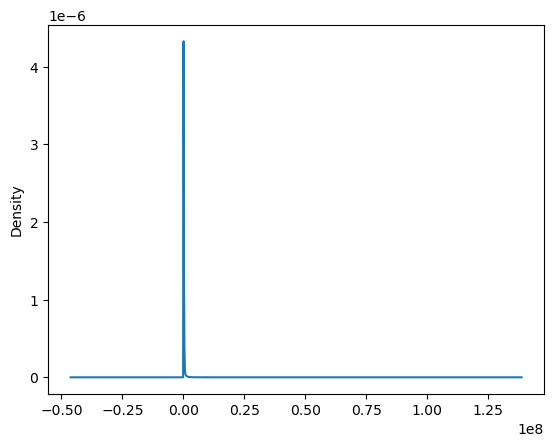

In [22]:
df['amount'].plot(kind='kde')

* The distribution of transaction amounts is **right skewed**. 
* This indicates that most values are clustered around the left tail of the distribution, with the longer right tail. 
* (mode < median < mean)

In [23]:
df['amount'].skew()

30.99394948249038

<AxesSubplot:ylabel='Density'>

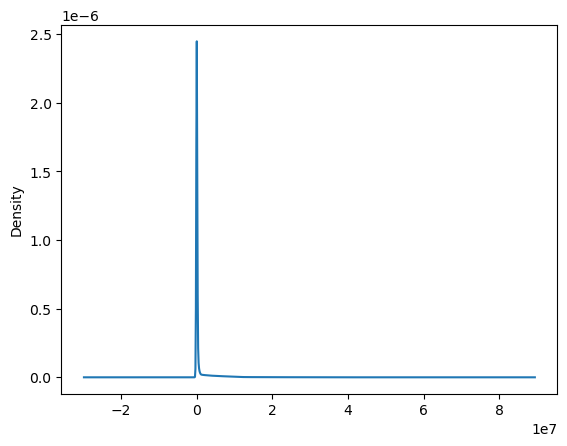

In [24]:
df['oldbalanceOrg'].plot(kind='kde')

* The distribution of pre-transaction balances of the initial customers is right skewed.

In [25]:
df['oldbalanceOrg'].skew()

5.249136420603121

<AxesSubplot:ylabel='Density'>

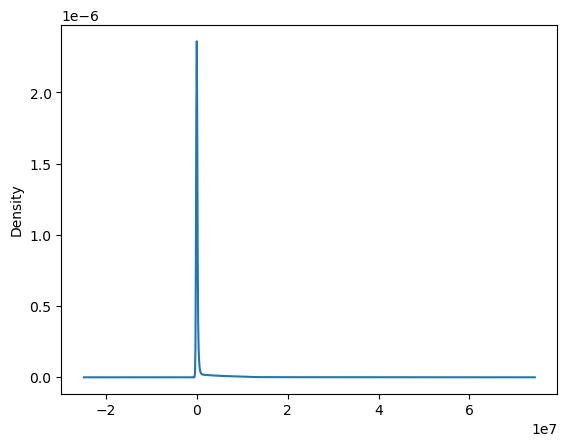

In [26]:
df['newbalanceOrig'].plot(kind='kde')

* The distribution of post-transaction balances of the initial customers is right skewed.

In [27]:
df['newbalanceOrig'].skew()

5.176884001159233

## bivariate analysis

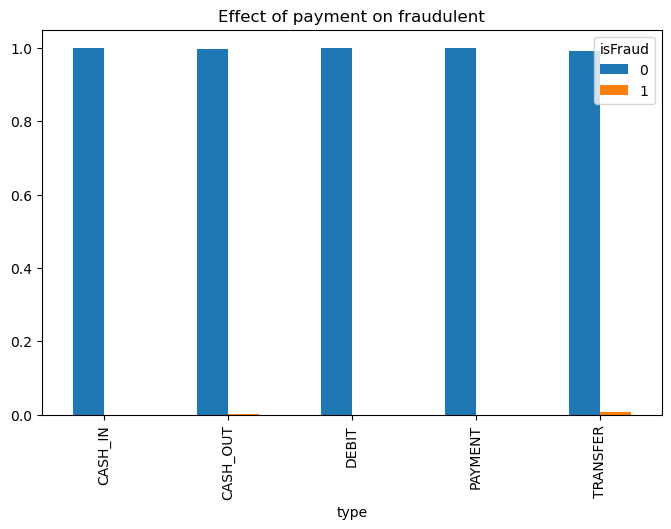

In [28]:
x = pd.crosstab(df['type'], df['isFraud'])
x.div(x.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked=False, figsize=(8,5))
plt.title('Effect of payment on fraudulent')
plt.show()

* Fraudulent transactions only occur in cash_out and transfer types.

## multivariate analysis

In [29]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


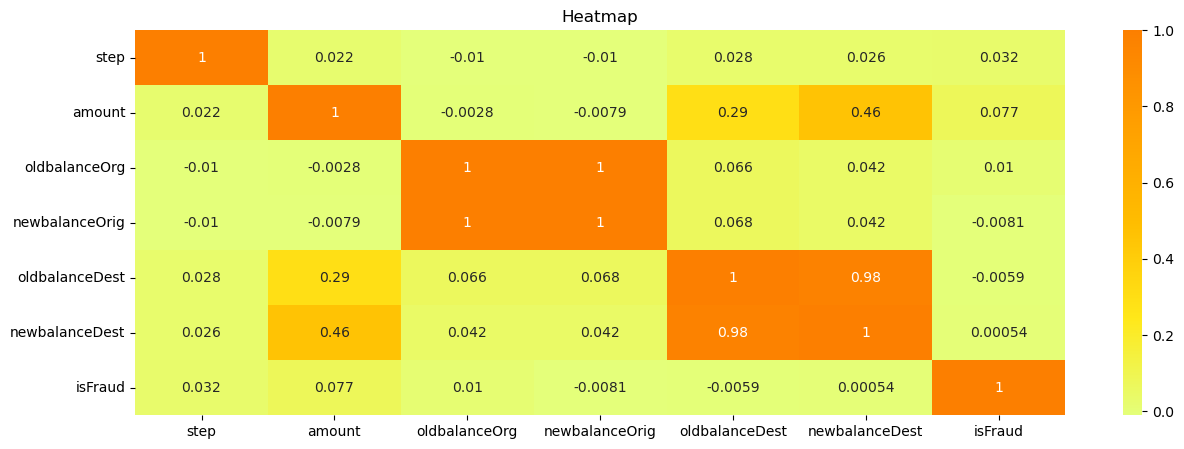

In [30]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, cmap='Wistia')
plt.title('Heatmap')
plt.show()

* oldbalanceOrg and newbalanceOrig has **strong positive** relationship. 
* oldbalanceDest and newbalanceDest has **strong positive** relationship.
* oldbalanceOrg and amount has **strong negative** relationship.
* newbalanceOrig and amount has **moderate negative** relationship.

## feature engineering

In [31]:
type_new = pd.get_dummies(df['type'], drop_first=True)
df_new = pd.concat([df, type_new], axis=1)
df_new.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,1,0


In [32]:
df_new.shape

(6362620, 14)

In [33]:
## features to get remove

corr_matrix = df.corr()

threshold = 0.95               ## set the correlation threshold

features_to_remove = set()      ## set to hold features to remove
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col_name = corr_matrix.columns[i]
            features_to_remove.add(col_name)
            
print(features_to_remove)

{'newbalanceDest', 'newbalanceOrig'}


In [34]:
## droping columns

df_new.drop(columns=['nameOrig','newbalanceOrig','nameDest','type','newbalanceDest'], axis=1,inplace=True)

In [35]:
df_new.shape

(6362620, 9)

In [36]:
df_new.duplicated().sum()

878

In [37]:
df_new.drop_duplicates(inplace = True)

In [38]:
df_new.shape

(6361742, 9)

In [39]:
df_new.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
oldbalanceDest    0
isFraud           0
CASH_OUT          0
DEBIT             0
PAYMENT           0
TRANSFER          0
dtype: int64

In [40]:
df_new['isFraud'].value_counts()

0    6353545
1       8197
Name: isFraud, dtype: int64

In [41]:
X = df_new.drop(columns=['isFraud'], axis=1)
Y = df_new['isFraud']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [43]:
X_train.shape, X_test.shape

((4453219, 8), (1908523, 8))

In [44]:
Y_train.shape, Y_test.shape

((4453219,), (1908523,))

In [45]:
Y_train.value_counts()

0    4447481
1       5738
Name: isFraud, dtype: int64

In [46]:
Y_test.value_counts()

0    1906064
1       2459
Name: isFraud, dtype: int64

In [47]:
# If Y_train or Y_test is a pandas Series or DataFrame
class_distribution_train = pd.Series(Y_train).value_counts(normalize=True)
class_distribution_test = pd.Series(Y_test).value_counts(normalize=True)

print(f"Class distribution in the training set:\n{class_distribution_train}")
print(f"Class distribution in the test set:\n{class_distribution_test}")

Class distribution in the training set:
0    0.998711
1    0.001289
Name: isFraud, dtype: float64
Class distribution in the test set:
0    0.998712
1    0.001288
Name: isFraud, dtype: float64


## Model Implementation

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lor = LogisticRegression(class_weight='balanced')
lor.fit(X_train, Y_train)
y_pred = lor.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [51]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print("Logistic Regression: \n")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)

Logistic Regression: 

Accuracy:  0.40379497653421
Precision:  0.001965972274615008
Recall:  0.9113460756405043
F1_score:  0.003923480745443833


In [52]:
print(confusion_matrix(Y_test, y_pred))

[[ 768411 1137653]
 [    218    2241]]


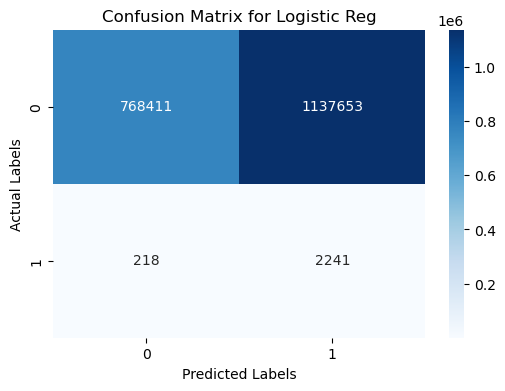

In [53]:
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Logistic Reg")
plt.show()

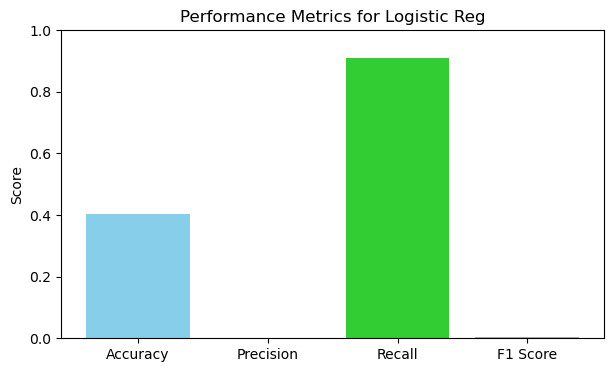

In [54]:
# Store metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting
plt.figure(figsize=(7,4))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'salmon', 'limegreen', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Metrics for Logistic Reg')
plt.show()

### Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, Y_train)
y_p = dt.predict(X_test)

In [57]:
accuracy = accuracy_score(Y_test, y_p)
precision = precision_score(Y_test, y_p)
recall = recall_score(Y_test, y_p)
f1 = f1_score(Y_test, y_p)

print("Decision Tree: \n")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)

Decision Tree: 

Accuracy:  0.9993749092884917
Precision:  0.7740259740259741
Recall:  0.7271248474989833
F1_score:  0.7498427343258545


In [58]:
print(confusion_matrix(Y_test, y_p))

[[1905542     522]
 [    671    1788]]


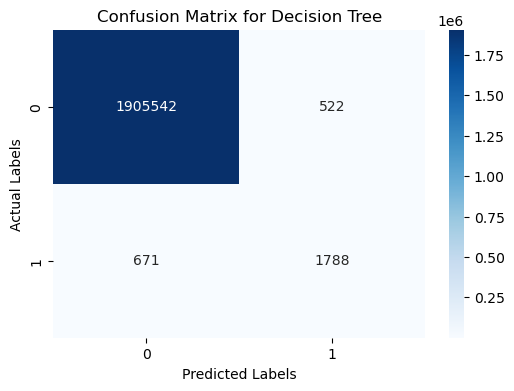

In [59]:
cm = confusion_matrix(Y_test, y_p)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

In [60]:
print(classification_report(Y_test, y_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906064
           1       0.77      0.73      0.75      2459

    accuracy                           1.00   1908523
   macro avg       0.89      0.86      0.87   1908523
weighted avg       1.00      1.00      1.00   1908523



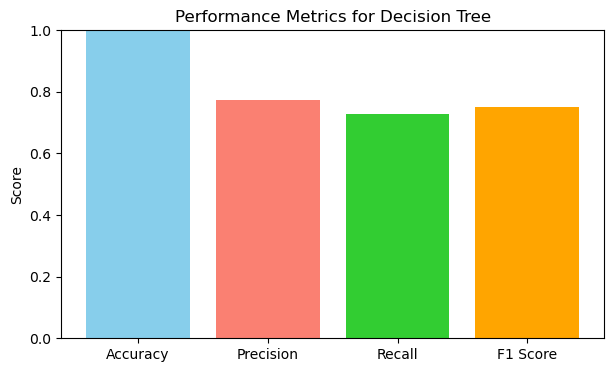

In [61]:
# Store metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting
plt.figure(figsize=(7,4))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'salmon', 'limegreen', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Metrics for Decision Tree')
plt.show()

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier(class_weight='balanced')
rfc.fit(X_train, Y_train)
y_pr = rfc.predict(X_test)

In [64]:
accuracy = accuracy_score(Y_test, y_pr)
precision = precision_score(Y_test, y_pr)
recall = recall_score(Y_test, y_pr)
f1 = f1_score(Y_test, y_pr)

print("Random Forest: \n")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)

Random Forest: 

Accuracy:  0.9995520095906625
Precision:  0.9426048565121413
Recall:  0.6945912972753152
F1_score:  0.7998126902364786


In [65]:
print(confusion_matrix(Y_test, y_pr))

[[1905960     104]
 [    751    1708]]


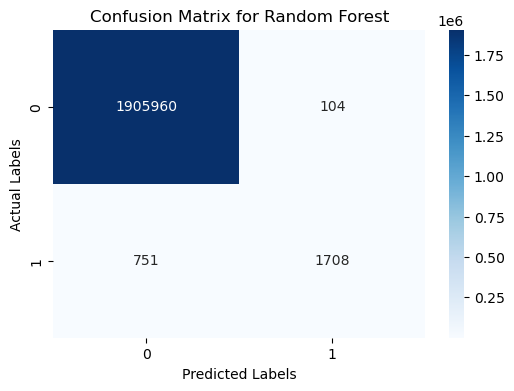

In [66]:
cm = confusion_matrix(Y_test, y_pr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

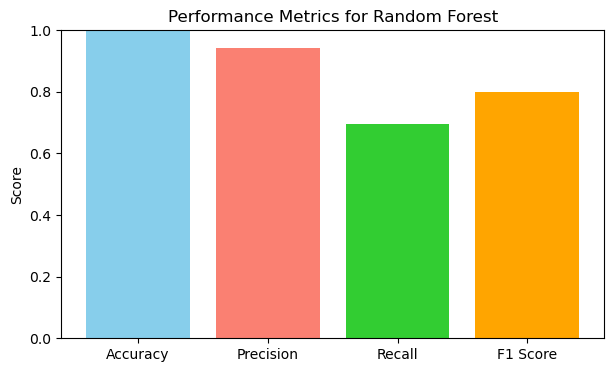

In [67]:
# Store metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting
plt.figure(figsize=(7,4))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'salmon', 'limegreen', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Metrics for Random Forest')
plt.show()

### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pre = knn.predict(X_test)

C:\Users\Rishika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [70]:
accuracy = accuracy_score(Y_test, y_pre)
precision = precision_score(Y_test, y_pre)
recall = recall_score(Y_test, y_pre)
f1 = f1_score(Y_test, y_pre)

print("KNN: \n")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)

KNN: 

Accuracy:  0.9994267818622045
Precision:  0.8353808353808354
Recall:  0.6913379422529483
F1_score:  0.756564307966177


In [71]:
print(confusion_matrix(Y_test, y_pre))

[[1905729     335]
 [    759    1700]]


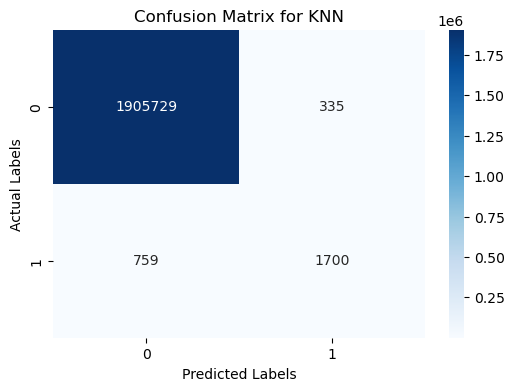

In [72]:
cm = confusion_matrix(Y_test, y_pre)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for KNN")
plt.show()

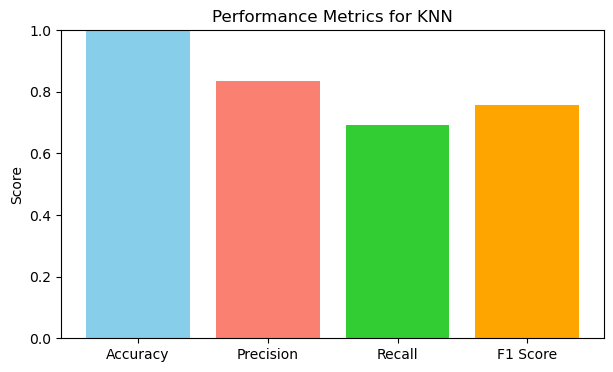

In [73]:
# Store metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}

# Plotting
plt.figure(figsize=(7,4))
plt.bar(metrics.keys(), metrics.values(), color=['skyblue', 'salmon', 'limegreen', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('Performance Metrics for KNN')
plt.show()

## Handling imbalance data using under sampling

In [74]:
## using under sampling

from imblearn.under_sampling import RandomUnderSampler

In [75]:
rus = RandomUnderSampler()
X_train_re, Y_train_re = rus.fit_resample(X_train, Y_train)     #under sampling

In [76]:
#under sampling
print(X_train_re.shape)
print(Y_train_re.shape)

(11476, 8)
(11476,)


In [77]:
Y_train_re.value_counts()           #under sampling

0    5738
1    5738
Name: isFraud, dtype: int64

## Scaling using Log transformation as the features are skewed

In [78]:
#scaling

X_train_scau = X_train_re.apply(np.log1p)  
X_test_scau = X_test.apply(np.log1p)       

## Model Building

### Logistic Regression

In [79]:
lorg = LogisticRegression(class_weight='balanced')
lorg.fit(X_train_scau, Y_train_re)

LogisticRegression(class_weight='balanced')

In [80]:
y_Predu = lorg.predict(X_test_scau)

In [124]:
#under sampling

accuracy = accuracy_score(Y_test, y_Predu)
precision = precision_score(Y_test, y_Predu)
recall = recall_score(Y_test, y_Predu)
f1 = f1_score(Y_test, y_Predu)

print("Logistic Regression:\n")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)

Logistic Regression:

Accuracy:  0.887487339686239
Precision:  0.01109217375282141
Recall:  0.9792598617324115
F1_score:  0.021935877640071235


In [82]:
print(confusion_matrix(Y_test, y_Predu))         #under sampling

[[1691382  214682]
 [     51    2408]]


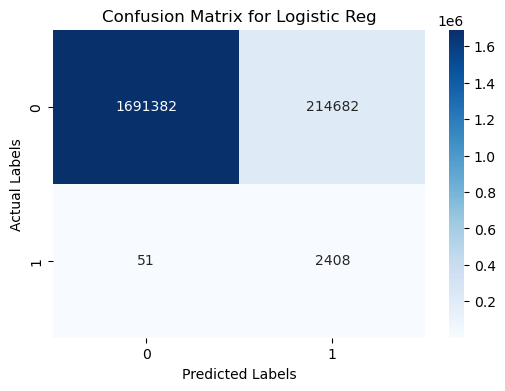

In [83]:
cm = confusion_matrix(Y_test, y_Predu)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Logistic Reg")
plt.show()

In [84]:
print(classification_report(Y_test, y_Predu))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1906064
           1       0.01      0.98      0.02      2459

    accuracy                           0.89   1908523
   macro avg       0.51      0.93      0.48   1908523
weighted avg       1.00      0.89      0.94   1908523



In [121]:
from sklearn.metrics import roc_auc_score
y_Predu_prob = lorg.predict_proba(X_test_scau)[:,1]

roc_auc_lr = roc_auc_score(Y_test, y_Predu_prob)
print("Logistic Regression ROC AUC: ", roc_auc_lr)

Logistic Regression ROC AUC:  0.9778773223101306


### Decision Tree

In [86]:
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train_scau, Y_train_re)

DecisionTreeClassifier(class_weight='balanced')

In [87]:
y_PRd = dtc.predict(X_test_scau)

In [126]:
# under sampling

accuracy = accuracy_score(Y_test, y_PRd)
precision = precision_score(Y_test, y_PRd)
recall = recall_score(Y_test, y_PRd)
f1 = f1_score(Y_test, y_PRd)

print("Decision Tree:\n")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)

Decision Tree:

Accuracy:  0.9735554667143126
Precision:  0.045445077730018366
Recall:  0.9760065067100447
F1_score:  0.08684639044689706


In [125]:
y_PRd_prob = dtc.predict_proba(X_test_scau)[:,1]
roc_auc_dt = roc_auc_score(Y_test, y_PRd_prob)
print("Decision Tree ROC AUC: ", roc_auc_dt)

Decision Tree ROC AUC:  0.9747794056772949


In [89]:
print(confusion_matrix(Y_test, y_PRd))         # under sampling

[[1855653   50411]
 [     59    2400]]


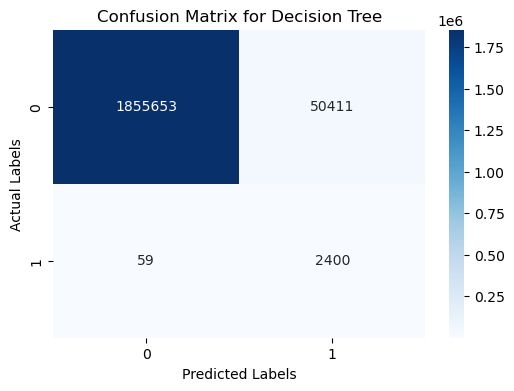

In [90]:
cm = confusion_matrix(Y_test, y_PRd)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

In [91]:
print(classification_report(Y_test, y_PRd)) 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1906064
           1       0.05      0.98      0.09      2459

    accuracy                           0.97   1908523
   macro avg       0.52      0.97      0.54   1908523
weighted avg       1.00      0.97      0.99   1908523



### KNN

In [93]:
k_nn = KNeighborsClassifier()
k_nn.fit(X_train_scau, Y_train_re)

KNeighborsClassifier()

In [94]:
y_PREd = k_nn.predict(X_test_scau)

C:\Users\Rishika\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [127]:
accuracy = accuracy_score(Y_test, y_PREd)
precision = precision_score(Y_test,y_PREd)
recall = recall_score(Y_test, y_PREd)
f1 = f1_score(Y_test, y_PREd)

print("KNN:\n")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)

KNN:

Accuracy:  0.9486047587584745
Precision:  0.024276191423738932
Recall:  0.9922732818218788
F1_score:  0.04739290466062601


In [129]:
y_PREd_prob = k_nn.predict_proba(X_test_scau)[:,1]
roc_auc_knn = roc_auc_score(Y_test, y_PREd_prob)
print("KNN ROC AUC: ", roc_auc_knn)

KNN ROC AUC:  0.9898911195857956


In [96]:
print(confusion_matrix(Y_test, y_PREd))

[[1807994   98070]
 [     19    2440]]


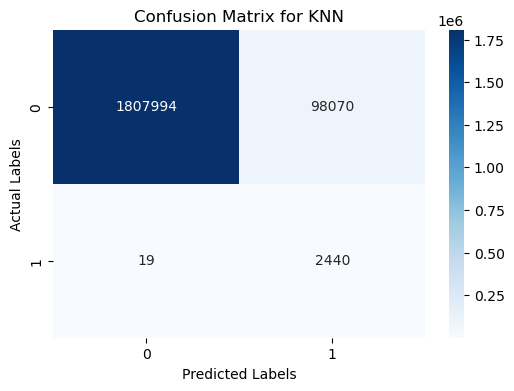

In [97]:
cm = confusion_matrix(Y_test, y_PREd)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for KNN")
plt.show()

In [98]:
print(classification_report(Y_test, y_PREd))             #under sampling

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906064
           1       0.02      0.99      0.05      2459

    accuracy                           0.95   1908523
   macro avg       0.51      0.97      0.51   1908523
weighted avg       1.00      0.95      0.97   1908523



### Random Forest

In [100]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_scau, Y_train_re)

RandomForestClassifier(class_weight='balanced')

In [101]:
y_PRE = rf.predict(X_test_scau)

In [130]:
accuracy = accuracy_score(Y_test, y_PRE)
precision = precision_score(Y_test, y_PRE)
recall = recall_score(Y_test, y_PRE)
f1 = f1_score(Y_test, y_PRE)

print("Random Forest:\n")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)

Random Forest:

Accuracy:  0.9724813376626847
Precision:  0.044444444444444446
Recall:  0.9930866205774705
F1_score:  0.08508117901191554


In [131]:
y_PRE_prob = rf.predict_proba(X_test_scau)[:,1]
roc_auc_rf = roc_auc_score(Y_test, y_PRE_prob)
print("Random Forest ROC AUC: ", roc_auc_rf)

Random Forest ROC AUC:  0.9981855214724787


In [103]:
print(confusion_matrix(Y_test, y_PRE))              # under sampling

[[1853561   52503]
 [     17    2442]]


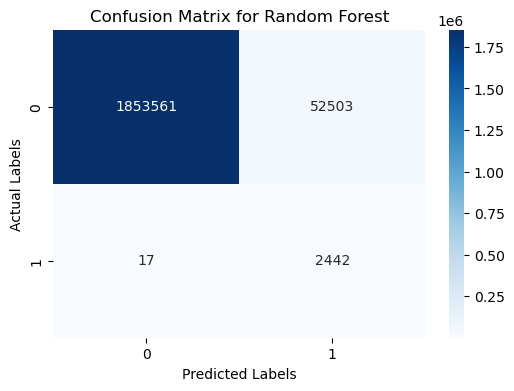

In [104]:
cm = confusion_matrix(Y_test, y_PRE)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Random Forest")
plt.show()

### Optimized Random Forest without thresholding

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
# random forest parameter grid

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(class_weight="balanced", random_state=42),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scau, Y_train_re)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [132]:
y_predi = best_model.predict(X_test_scau)

accuracy = accuracy_score(Y_test, y_predi)
precision = precision_score(Y_test, y_predi)
recall = recall_score(Y_test, y_predi)
f1 = f1_score(Y_test, y_predi)

print("Optimized Random Forest:\n")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)

Optimized Random Forest:

Accuracy:  0.9747296731556288
Precision:  0.048298594662877
Recall:  0.9951199674664498
F1_score:  0.09212582120738663


In [134]:
y_predi_prob = best_model.predict_proba(X_test_scau)[:,1]
roc_auc_grf = roc_auc_score(Y_test, y_predi_prob)
print("Optimized Random Forest ROC AUC: ", roc_auc_grf)

Optimized Random Forest ROC AUC:  0.9984259743772382


In [109]:
print(confusion_matrix(Y_test, y_predi))

[[1857847   48217]
 [     12    2447]]


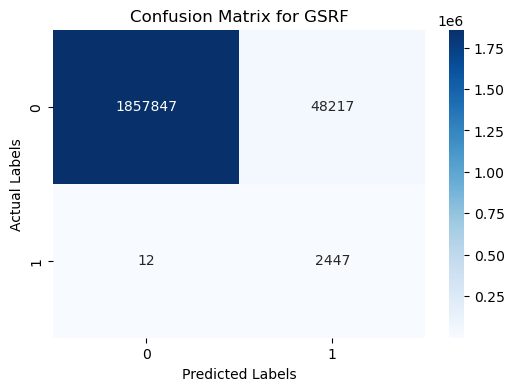

In [110]:
cm = confusion_matrix(Y_test, y_predi)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Optimized RF")
plt.show()

### Optimized Random Forest with thresholding 

In [138]:
# Optimized Random Forest with thresholding 
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid search with F1 scoring
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(class_weight="balanced", random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5, n_jobs=-1, verbose=2
)

grid_search.fit(X_train_scau, Y_train_re)

# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Get predicted probabilities for the positive class
y_probs = best_model.predict_proba(X_test_scau)[:, 1]

# Compute precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, y_probs)

# Compute the F1-score at each threshold obtained from the precision_recall_curve
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

# Find the best threshold
best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold (max F1):", best_threshold)
print("Max F1-score:", np.max(f1_scores))

# Predict using best threshold
y_predi_thresh = (y_probs >= best_threshold).astype(int)

# Final evaluation
accuracy = accuracy_score(Y_test, y_predi_thresh)
precision_final = precision_score(Y_test, y_predi_thresh)
recall_final = recall_score(Y_test, y_predi_thresh)
f1_final = f1_score(Y_test, y_predi_thresh)

print("\nOptimized Random Forest (Threshold Tuned):\n")
print("Accuracy: ", accuracy)
print("Precision: ", precision_final)
print("Recall: ", recall_final)
print("F1_score: ", f1_final)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Threshold (max F1): 0.995
Max F1-score: 0.7522545875588688

Optimized Random Forest (Threshold Tuned):

Accuracy:  0.9993811968731842
Precision:  0.7768630849220104
Recall:  0.7291581943879626
F1_score:  0.7522550870568492


In [139]:
print(classification_report(Y_test, y_predi_thresh))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906064
           1       0.78      0.73      0.75      2459

    accuracy                           1.00   1908523
   macro avg       0.89      0.86      0.88   1908523
weighted avg       1.00      1.00      1.00   1908523



In [141]:
print(confusion_matrix(Y_test, y_predi_thresh))

[[1905549     515]
 [    666    1793]]


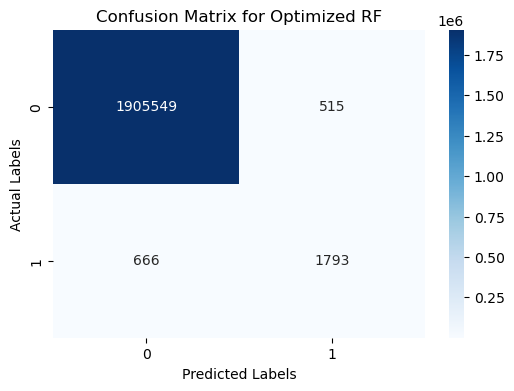

In [149]:
cm = confusion_matrix(Y_test, y_predi_thresh)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Optimized RF")
plt.show()

### XGBoost

In [160]:
# Manual value lists for hyperparameters
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, (Y_train == 0).sum() / (Y_train == 1).sum()]
}

# Randomized search
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='f1',
    n_iter=30,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scau, Y_train_re)
xgb = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)

# Predict probabilities
y_probs = xgb.predict_proba(X_test_scau)[:, 1]

y_pred_rand = xgb.predict(X_test_scau)

# Evaluation
accuracy = accuracy_score(Y_test, y_pred_rand)
precision = precision_score(Y_test, y_pred_rand)
recall = recall_score(Y_test, y_pred_rand)
f1 = f1_score(Y_test, y_pred_rand)
roc_auc = roc_auc_score(Y_test, y_probs)
cm = confusion_matrix(Y_test, y_pred_rand)

print("\n XGBoost:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)
print("ROC AUC: ", roc_auc)
print("\nConfusion Matrix:\n", cm)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\Rishika\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters:
 {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}

 XGBoost with RandomizedSearchCV + Threshold Tuned:
Accuracy:  0.9829166323905973
Precision:  0.06988556915789174
Recall:  0.9959333062220415
F1_score:  0.13060636766039146
ROC AUC:  0.999113256792744

Confusion Matrix:
 [[1873470   32594]
 [     10    2449]]


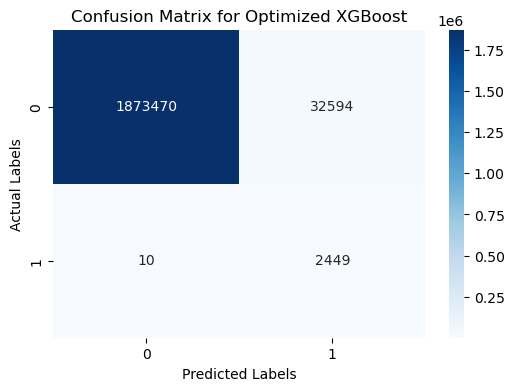

In [161]:
cm = confusion_matrix(Y_test, y_pred_rand)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Optimized XGBoost")
plt.show()

In [146]:
# Define parameter grid for XGBoost
from xgboost import XGBClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, (Y_train == 0).sum() / (Y_train == 1).sum()]  # handle imbalance
}

# Grid Search
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(xgb, param_grid, scoring='f1', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scau, Y_train_re)

best_xgb = grid_search.best_estimator_
print("Best Parameters:\n", grid_search.best_params_)

# Predict probabilities and tune threshold
y_probs = best_xgb.predict_proba(X_test_scau)[:, 1]

thresholds = np.arange(0.01, 1.0, 0.01)
f1_scores = [f1_score(Y_test, (y_probs >= t).astype(int)) for t in thresholds]

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\nBest Threshold (max F1): {best_threshold}")

# Final prediction using best threshold
y_pred = (y_probs >= best_threshold).astype(int)

# Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_probs)
cm = confusion_matrix(Y_test, y_pred)

print("\n XGBoost with Threshold Tuned:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)
print("ROC AUC: ", roc_auc)
print("\nConfusion Matrix:\n", cm)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


C:\Users\Rishika\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [18:04:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters:
 {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}

Best Threshold (max F1): 0.99

 XGBoost with Threshold Tuned:
Accuracy:  0.999090396081158
Precision:  0.6059806508355321
Recall:  0.840585603904026
F1_score:  0.704258943781942
ROC AUC:  0.999052419517746

Confusion Matrix:
 [[1904720    1344]
 [    392    2067]]


In [150]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906064
           1       0.61      0.84      0.70      2459

    accuracy                           1.00   1908523
   macro avg       0.80      0.92      0.85   1908523
weighted avg       1.00      1.00      1.00   1908523



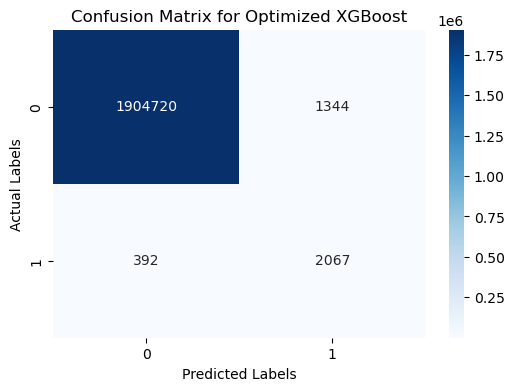

In [148]:
cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Optimized XGBoost")
plt.show()

### XGBoost with Randomized search CV and Threshold tunning

In [172]:
from sklearn.model_selection import RandomizedSearchCV

# Manual value lists for hyperparameters
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, (Y_train == 0).sum() / (Y_train == 1).sum()]
}

# Randomized search
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring='f1',
    n_iter=30,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scau, Y_train_re)
xgb_ran = random_search.best_estimator_
print("Best Parameters:\n", random_search.best_params_)

# Predict probabilities
y_probs = xgb_ran.predict_proba(X_test_scau)[:, 1]

# Threshold tuning (optimize F1-score)
thresholds = np.arange(0.01, 1.0, 0.01)
f1_scores = [f1_score(Y_test, (y_probs >= t).astype(int)) for t in thresholds]

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"\nBest Threshold (max F1): {best_threshold}")

# Final prediction using best threshold
y_pred_ran = (y_probs >= best_threshold).astype(int)

# Evaluation
accuracy = accuracy_score(Y_test, y_pred_ran)
precision = precision_score(Y_test, y_pred_ran)
recall = recall_score(Y_test, y_pred_ran)
f1 = f1_score(Y_test, y_pred_ran)
roc_auc = roc_auc_score(Y_test, y_probs)
cm = confusion_matrix(Y_test, y_pred_ran)

print("\n XGBoost with RandomizedSearchCV + Threshold Tuned:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", f1)
print("ROC AUC: ", roc_auc)
print("\nConfusion Matrix:\n", cm)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\Rishika\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [23:38:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters:
 {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}

Best Threshold (max F1): 0.99

 XGBoost with RandomizedSearchCV + Threshold Tuned:
Accuracy:  0.9982122300857784
Precision:  0.4115791426980887
Recall:  0.9019926799511997
F1_score:  0.5652395514780836
ROC AUC:  0.999113256792744

Confusion Matrix:
 [[1902893    3171]
 [    241    2218]]


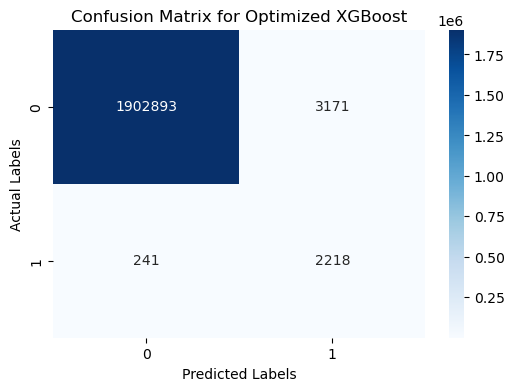

In [173]:
cm = confusion_matrix(Y_test, y_pred_ran)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for Optimized XGBoost")
plt.show()

In [174]:
print(classification_report(Y_test, y_pred_ran))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906064
           1       0.41      0.90      0.57      2459

    accuracy                           1.00   1908523
   macro avg       0.71      0.95      0.78   1908523
weighted avg       1.00      1.00      1.00   1908523



* If our goal is a well-balanced model with high fraud detection capability and fewer false alarms, then we go with XGBoost with Threshold Tuning Only with Accuracy: 0.99, Precision: 0.61, Recall: 0.84, F1_score: 0.71, ROC AUC: 0.99.

* However, if we want to catch as many frauds as possible even if the model raise more false alarms, then XGBoost with RandomizedSearchCV + Threshold Tuning with Accuracy: 0.99, Precision: 0.41, Recall: 0.90, F1_score: 0.57, ROC AUC: 0.99